In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = r"E:\UF MSADS\SEM 1\Programming for DS\Mini project\Mini project 3"

**DATA CLEANING & PREPROCESSING**

In [3]:
# Read the data from the CSV file into a DataFrame and display the data
df = pd.read_csv('new_train_EGN5442.csv')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x30,x31,x4,x6
0,0,1,#54359,Female,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,12.0,D_C,Bt,1,(192&&),NaN,2.380952,4,50
1,1,1,#84649,Female,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0.0,L_C,Bt,1,(1034&&),NaN,inf,4,44
2,2,0,#59015,Female,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,8.0,L_C,Bt,3,(1452&&),NaN,inf,4,72
3,3,0,#99990,Female,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0.0,L_C,PT,3,(916&&),NaN,inf,4,38
4,4,1,#83569,Male,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0.0,L_C,Bt,1,(390&&),NaN,inf,4,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,104717,1,#30483,Male,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,38.0,L_C,Bt,1,(1371&&),NaN,0.385714,4,27
104718,104718,0,#23530,Female,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,33.0,L_C,Bt,2,(1703&&),NaN,10.333333,4,62
104719,104719,0,#88477,Male,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,7.0,L_C,PT,3,(562&&),NaN,2.812500,4,45
104720,104720,0,#17164,Male,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0.0,L_C,PT,2,(315&&),NaN,inf,4,57


In [4]:
# Examine Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104722 entries, 0 to 104721
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  104722 non-null  int64  
 1   y           104722 non-null  int64  
 2   x2          104722 non-null  object 
 3   x3          104722 non-null  object 
 4   x5          104722 non-null  int64  
 5   x9          104722 non-null  int64  
 6   x10         104722 non-null  int64  
 7   x11         104722 non-null  int64  
 8   x12         104722 non-null  int64  
 9   x13         104722 non-null  int64  
 10  x14         104722 non-null  object 
 11  x15         104722 non-null  int64  
 12  x16         104722 non-null  int64  
 13  x17         104722 non-null  int64  
 14  x18         104722 non-null  int64  
 15  x19         104722 non-null  int64  
 16  x20         104722 non-null  int64  
 17  x21         104722 non-null  int64  
 18  x22         104722 non-null  int64  
 19  x2

In [5]:
# Check class distribution of labelled data
df['y'].value_counts() 

y
0    59547
1    45175
Name: count, dtype: int64

In [6]:
# Deal with constant features
constant_features = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_features, inplace=True)
df

,Unnamed: 0,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x30,x31,x6
0,0,1,#54359,Female,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,12.0,D_C,Bt,1,(192&&),NaN,2.380952,50
1,1,1,#84649,Female,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0.0,L_C,Bt,1,(1034&&),NaN,inf,44
2,2,0,#59015,Female,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,8.0,L_C,Bt,3,(1452&&),NaN,inf,72
3,3,0,#99990,Female,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0.0,L_C,PT,3,(916&&),NaN,inf,38
4,4,1,#83569,Male,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0.0,L_C,Bt,1,(390&&),NaN,inf,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,104717,1,#30483,Male,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,38.0,L_C,Bt,1,(1371&&),NaN,0.385714,27
104718,104718,0,#23530,Female,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,33.0,L_C,Bt,2,(1703&&),NaN,10.333333,62
104719,104719,0,#88477,Male,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,7.0,L_C,PT,3,(562&&),NaN,2.812500,45
104720,104720,0,#17164,Male,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0.0,L_C,PT,2,(315&&),NaN,inf,57


In [7]:
# Drop Columns which are not necessary

# drop column x6 (Same values as x5)
df = df.drop('x6', axis=1)
# drop column x0 (Row header not required)
df = df.drop('Unnamed: 0', axis=1)
# drop column x30 (contains NaN)
df = df.drop('x30', axis=1)

In [8]:
# Remove '#' and convert to int for column x2
df['x2'] = df['x2'].str.replace('#', '').astype(int)

# Convert gender to Numbers
df['x3'] = df['x3'].apply(lambda x: 0 if x == 'Female' else 1).astype(int)

# Remove _
df['x25'] = df['x25'].astype(str).str.replace('_', '')

# Convert to upper case
df['x26'] = df.apply(lambda x: x.x26.upper(), axis=1)

# Remove non-numeric characters and convert to int for column x29
df['x29'] = df['x29'].str.replace(r'[^0-9]', '', regex=True).astype(int)

# Display Dataframe
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x31
0,1,54359,0,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,12.0,DC,BT,1,192,2.380952
1,1,84649,0,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0.0,LC,BT,1,1034,inf
2,0,59015,0,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,8.0,LC,BT,3,1452,inf
3,0,99990,0,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0.0,LC,PT,3,916,inf
4,1,83569,1,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0.0,LC,BT,1,390,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,38.0,LC,BT,1,1371,0.385714
104718,0,23530,0,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,33.0,LC,BT,2,1703,10.333333
104719,0,88477,1,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,7.0,LC,PT,3,562,2.812500
104720,0,17164,1,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0.0,LC,PT,2,315,inf


In [9]:
# Convert DC = 1, LC = 0 
df['x25'] = df['x25'].apply(lambda x: 0 if x == 'LC' else 1 ).astype(int) # Convert the datatype
# Convert BT = 1, PT = 0
df['x26'] = df['x26'].apply(lambda x: 0 if x == 'PT' else 1 ).astype(int) # Convert the datatype

In [10]:
df['x14'] = pd.to_numeric(df['x14'].str.replace(' ', ''), errors='coerce').astype("Int64") # Convert the datatype

In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf and -inf to NaN
df['x24'] = df['x24'].fillna(0).astype(int) # Replace NaN with 0 and convert to int

In [12]:
# df = df[df['x24'].apply(np.isfinite)]
# df['x24'] = df['x24'].astype(int)

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf and -inf to NaN
df['x31'] = df['x31'].fillna(0).astype(int) # Replace NaN with 0 and convert to int
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x31
0,1,54359,0,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,12,1,1,1,192,2
1,1,84649,0,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0,0,1,1,1034,0
2,0,59015,0,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,8,0,1,3,1452,0
3,0,99990,0,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0,0,0,3,916,0
4,1,83569,1,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0,0,1,1,390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,38,0,1,1,1371,0
104718,0,23530,0,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,33,0,1,2,1703,10
104719,0,88477,1,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,7,0,0,3,562,2
104720,0,17164,1,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0,0,0,2,315,0


In [14]:
# Check missing data
df.isnull().sum()

y         0
x2        0
x3        0
x5        0
x9        0
x10       0
x11       0
x12       0
x13       0
x14    2471
x15       0
x16       0
x17       0
x18       0
x19       0
x20       0
x21       0
x22       0
x23       0
x24       0
x25       0
x26       0
x28       0
x29       0
x31       0
dtype: int64

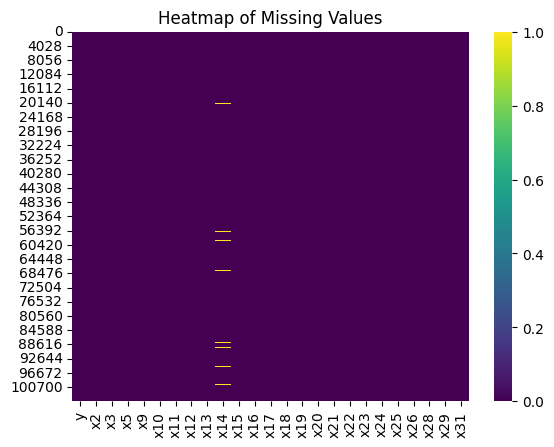

In [15]:
# Visualization for missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [16]:
# Replace inf values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Fill numeric missing values with median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Check by displaying again
df.isnull().sum()

y      0
x2     0
x3     0
x5     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x28    0
x29    0
x31    0
dtype: int64

In [17]:
# Check duplicated rows
df.duplicated().sum()

np.int64(818)

In [18]:
df = df.drop_duplicates(keep=False)
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29,x31
0,1,54359,0,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,12,1,1,1,192,2
1,1,84649,0,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0,0,1,1,1034,0
2,0,59015,0,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,8,0,1,3,1452,0
3,0,99990,0,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0,0,0,3,916,0
4,1,83569,1,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0,0,1,1,390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,38,0,1,1,1371,0
104718,0,23530,0,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,33,0,1,2,1703,10
104719,0,88477,1,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,7,0,0,3,562,2
104720,0,17164,1,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0,0,0,2,315,0


In [19]:
# Check highly correlated columns/features
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Identify highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append(
                (correlation_matrix.columns[i],
                 correlation_matrix.columns[j],
                 correlation_matrix.iloc[i, j])
            )

print("Highly correlated features (>0.8):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} - {feat2}: {corr:.2f}")

# Option: Drop one of each pair of highly correlated features
features_to_drop = {pair[1] for pair in high_corr_pairs}
df = df.drop(columns=features_to_drop)

print("\nColumn dropped to reduce multicollinearity:")
print(features_to_drop)

# Display the shape of the dataset
print("\nReduced shape:", df.shape)

Highly correlated features (>0.8):
x23 - x24: 0.96

Column dropped to reduce multicollinearity:
{'x24'}

Reduced shape: (103086, 24)


In [20]:
# Explore the categorical data columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x28,x29,x31
0,1,54359,0,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,1,1,1,192,2
1,1,84649,0,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0,1,1,1034,0
2,0,59015,0,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,0,1,3,1452,0
3,0,99990,0,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0,0,3,916,0
4,1,83569,1,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0,1,1,390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,0,1,1,1371,0
104718,0,23530,0,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,0,1,2,1703,10
104719,0,88477,1,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,0,0,3,562,2
104720,0,17164,1,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0,0,2,315,0


In [21]:
df['age'] = pd.qcut(df['x5'], q=4, labels=['Young', 'Young Adult', 'Adult', 'Senior'])
print(df['age'].value_counts())

age
Young Adult    26872
Young          26270
Adult          25307
Senior         24637
Name: count, dtype: int64


In [22]:
df = df.rename(columns = {"x5":"x4", "x9":"x5", "x10":"x6", "x11":"x7", "x12":"x8", "x13":"x9",
                      "x14":"x10", "x15":"x11", "x16":"x12", "x17":"x13", "x18":"x14",
                      "x19":"x15", "x20":"x16", "x21":"x17", "x22":"x18", "x23":"x19",
                      "x25":"x20", "x26":"x21", "x28":"x22", "x29":"x23", "x31":"x24"})
df

,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,age
0,1,54359,0,50,5,5,5,4,3,5,3,3,4,5,5,3,4,3,21,1,1,1,192,2,Adult
1,1,84649,0,44,1,1,1,1,3,3,1,4,4,4,4,4,4,2,0,0,1,1,1034,0,Adult
2,0,59015,0,72,3,1,5,5,3,2,2,3,3,3,3,1,3,2,0,0,1,3,1452,0,Senior
3,0,99990,0,38,1,3,1,3,5,1,5,5,2,4,4,1,4,5,0,0,0,3,916,0,Young Adult
4,1,83569,1,37,5,5,5,5,2,5,5,4,4,4,4,4,4,5,0,0,1,1,390,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104717,1,30483,1,27,5,5,5,5,5,5,5,5,3,2,5,3,5,5,70,0,1,1,1371,0,Young
104718,0,23530,0,62,1,4,4,4,4,2,4,1,1,1,1,3,1,3,6,0,1,2,1703,10,Senior
104719,0,88477,1,45,3,4,3,5,1,3,1,1,3,3,5,3,4,1,16,0,0,3,562,2,Adult
104720,0,17164,1,57,2,4,2,2,4,2,4,4,3,4,5,2,3,4,0,0,0,2,315,0,Senior


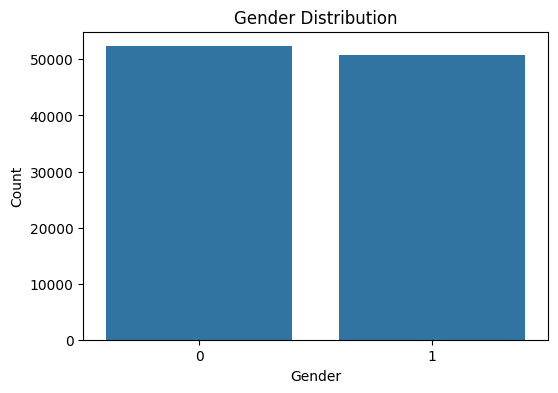

In [23]:
# Plot 1: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x = 'x3')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

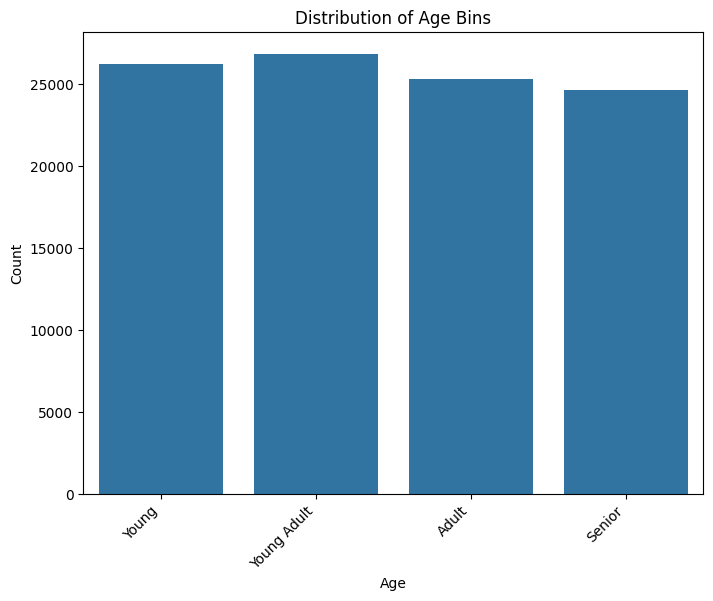

In [24]:
# Plot 2: Age Bin Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age')
plt.title("Distribution of Age Bins")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
# Mapping age to numbers
age_mapping = {
    'Young': 1,
    'Young Adult': 2,
    'Adult': 3,
    'Senior': 4
}
df['age'] = df['age'].map(age_mapping)

In [26]:
# Uncomment to Check 
# df.duplicated().sum()

In [27]:
# Uncomment to Check 
# df.info()

In [28]:
# Drop rows with missing values
data = df.dropna()

# Convert the datatype
df['x10'] = df['x10'].astype(int)

# Convert to int64
df['age'] = df['age'].astype(int)

In [29]:
# Examine cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103086 entries, 0 to 104721
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   y       103086 non-null  int64
 1   x2      103086 non-null  int64
 2   x3      103086 non-null  int64
 3   x4      103086 non-null  int64
 4   x5      103086 non-null  int64
 5   x6      103086 non-null  int64
 6   x7      103086 non-null  int64
 7   x8      103086 non-null  int64
 8   x9      103086 non-null  int64
 9   x10     103086 non-null  int64
 10  x11     103086 non-null  int64
 11  x12     103086 non-null  int64
 12  x13     103086 non-null  int64
 13  x14     103086 non-null  int64
 14  x15     103086 non-null  int64
 15  x16     103086 non-null  int64
 16  x17     103086 non-null  int64
 17  x18     103086 non-null  int64
 18  x19     103086 non-null  int64
 19  x20     103086 non-null  int64
 20  x21     103086 non-null  int64
 21  x22     103086 non-null  int64
 22  x23     103086 non-null  

**DATA VISUALIZATION**

<Axes: xlabel='y'>

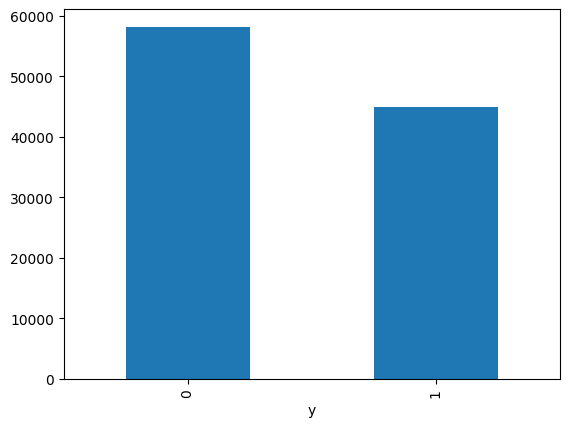

In [30]:
# Plot 3: Value count of labelled data
df['y'].value_counts().plot(kind='bar')

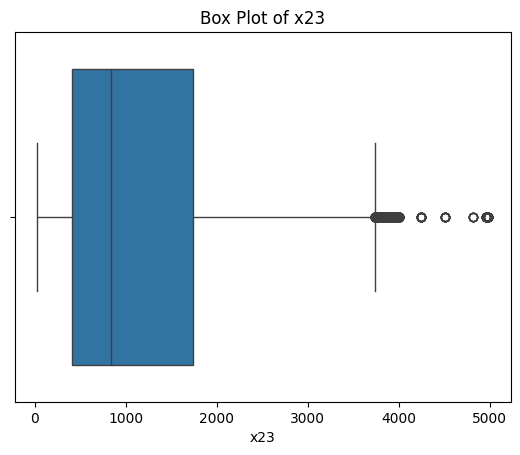

In [31]:
# Plot 4: Check outliers
sns.boxplot(x=df['x23'])
plt.title('Box Plot of x23')
plt.show()

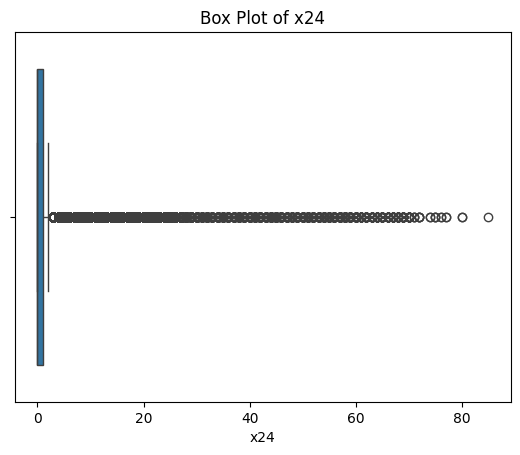

In [32]:
# Check outliers
sns.boxplot(x=df['x24'])
plt.title('Box Plot of x24')
plt.show()

Text(0.5, 1.0, 'Distribution of x4 Feature')

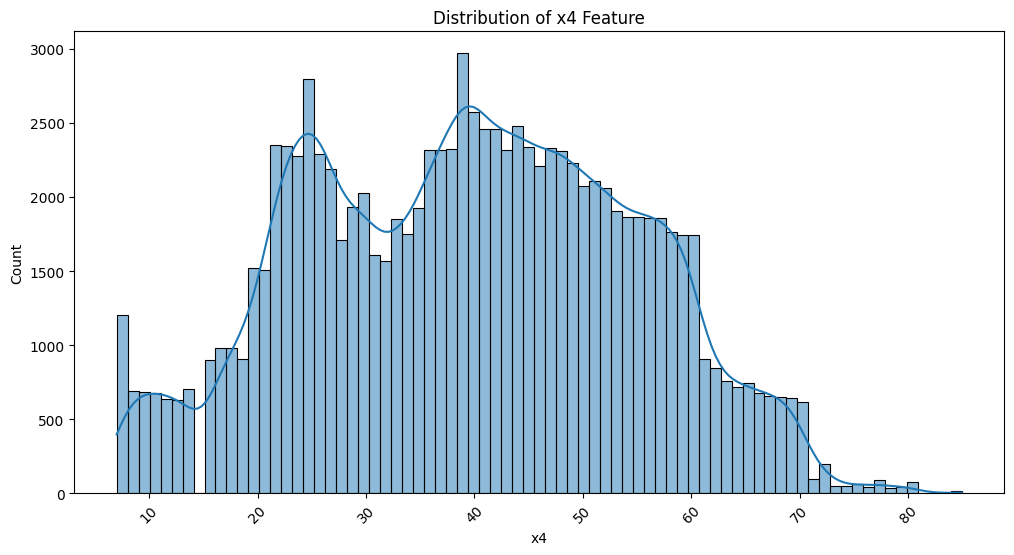

In [33]:
# Plot 5: x4 feature distribution (age without grouping)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='x4', kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of x4 Feature')

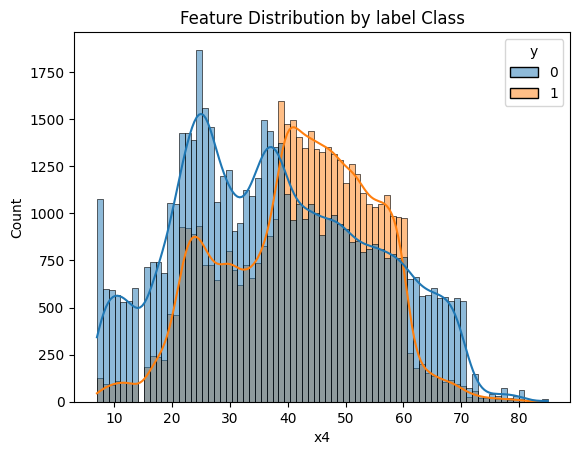

In [34]:
# Plot 6: Compare feature distributions across label class
sns.histplot(data=df, x='x4', hue='y', kde=True)
plt.title('Feature Distribution by label Class')
plt.show()

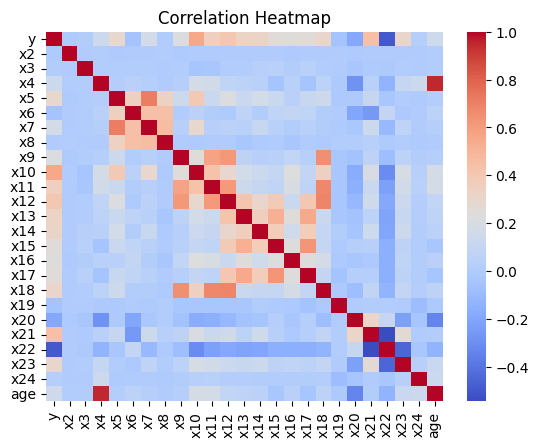

In [35]:
# Plot 7: Correlation Matrix for the cleaned data
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Correlation with the labelled column
label_corr = df.corr()['y'].sort_values(ascending=False)
label_corr

y      1.000000
x10    0.558599
x21    0.448169
x12    0.399373
x11    0.349989
x13    0.323773
x14    0.315097
x18    0.305996
x23    0.298418
x5     0.283885
x15    0.249498
x17    0.246206
x16    0.237205
x9     0.210174
x7     0.170807
age    0.146267
x4     0.132534
x24    0.027010
x3     0.012064
x8     0.000678
x2    -0.004773
x19   -0.050213
x6    -0.050869
x20   -0.189694
x22   -0.494175
Name: y, dtype: float64

In [37]:
df.to_csv('cleaned_data.csv')